In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import classification_report

from sklearn.metrics import recall_score, precision_score, f1_score

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
wine_train = pd.read_csv(path_train) #wine_train
wine_test = pd.read_csv(path_test) #wine_train

In [7]:
# Блок(и) обучения и поверки модели

In [8]:
# Проверка на дубликаты!

wine_duplicate = wine_train[wine_train.duplicated()]
wine_duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [9]:
wine_train['good quality'] = [0 if i < 7 else 1 for i in wine_train['quality']]
wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,0


In [10]:
X = wine_train.drop(['quality', 'good quality'], axis = 1)
y = wine_train['good quality']
display(X, y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4
...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7


0       1
1       1
2       0
3       1
4       0
       ..
1720    0
1721    0
1722    1
1723    1
1724    1
Name: good quality, Length: 1725, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [12]:
pipe_best = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors = 16, p = 1, metric = 'cosine', weights = 'uniform'))

pipe_best.fit(X_train, y_train)

y_pred_best = pipe_best.predict(X_test)

#print("Тренировака:", pipe_best.score(X_train, y_train), "Тест:", pipe_best.score(X_test, y_test))

In [13]:
# Считаю метрику precision, поскольку она, на мой взгляд, лучше всего оценивает данную модель

print('precision:', precision_score(y_test, y_pred_best))

precision: 0.6788990825688074


In [14]:
# Блок предсказания с использованием тестового набора

In [15]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pipe_best.predict(wine_test)

0.734375

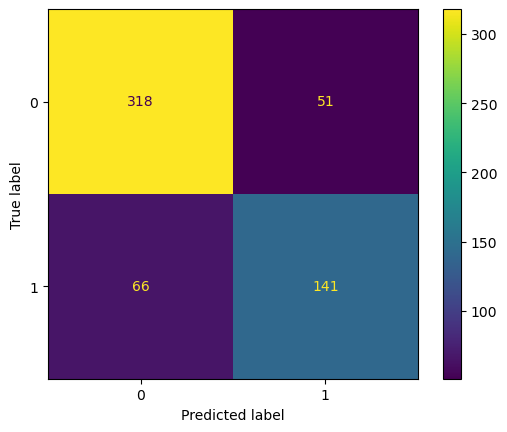

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)